In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'precise-crowbar-414008' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=precise-crowbar-414008:EU:bquxjob_1a174229_18ef0415765)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_1a174229_18ef0415765') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `precise-crowbar-414008.neo_bank.transactions`


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_1a174229_18ef0415765') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_1727,REFUND,AED,639.31,COMPLETED,None,NaN,None,None,INBOUND,user_182,2018-03-31 13:03:46.796231+00:00
1,transaction_1102,TOPUP,AED,1032.24,COMPLETED,None,NaN,None,None,INBOUND,user_4773,2018-11-21 17:27:32.432363+00:00
2,transaction_4261,EXCHANGE,AED,1.19,COMPLETED,None,NaN,None,None,OUTBOUND,user_550,2019-04-22 12:49:47.674069+00:00
3,transaction_17181,EXCHANGE,AED,0.67,COMPLETED,None,NaN,None,None,OUTBOUND,user_6009,2019-03-01 05:49:35.148869+00:00
4,transaction_1755712,EXCHANGE,AED,0.09,COMPLETED,None,NaN,None,None,OUTBOUND,user_12569,2018-11-09 19:41:03.373335+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2740070,transaction_1809847,CARD_PAYMENT,ZAR,3.91,COMPLETED,FALSE,8931.0,Newlands,ZAF,OUTBOUND,user_19085,2019-04-24 11:58:00.058703+00:00
2740071,transaction_88761,CARD_REFUND,ZAR,0.95,COMPLETED,None,8999.0,London,GBR,INBOUND,user_4695,2018-06-24 19:51:54.730987+00:00
2740072,transaction_89737,CARD_PAYMENT,ZAR,8.94,COMPLETED,TRUE,8999.0,London,GBR,OUTBOUND,user_4695,2018-06-20 17:43:41.381987+00:00
2740073,transaction_90084,CARD_PAYMENT,ZAR,5.29,COMPLETED,TRUE,8999.0,London,GBR,OUTBOUND,user_4695,2018-06-15 20:57:38.685987+00:00


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,amount_usd,ea_merchant_mcc
count,2.740075e+06,1.581417e+06
mean,1.703225e+05,5.699736e+03
std,9.634014e+07,9.493660e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.822000e+01,5.921000e+03
max,8.510645e+10,9.406000e+03


# Editing for me

In [5]:
results.info()
# the number of columns is : 12 , the rows is : 2740075
# primary key : user_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740075 entries, 0 to 2740074
Data columns (total 12 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   transaction_id         object             
 1   transactions_type      object             
 2   transactions_currency  object             
 3   amount_usd             float64            
 4   transactions_state     object             
 5   ea_cardholderpresence  object             
 6   ea_merchant_mcc        float64            
 7   ea_merchant_city       object             
 8   ea_merchant_country    object             
 9   direction              object             
 10  user_id                object             
 11  created_date           datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(2), object(9)
memory usage: 250.9+ MB


In [6]:
results.isnull().sum()

transaction_id                 0
transactions_type              0
transactions_currency          0
amount_usd                     0
transactions_state             0
ea_cardholderpresence    1170594
ea_merchant_mcc          1158658
ea_merchant_city         1158794
ea_merchant_country      1158979
direction                      0
user_id                        0
created_date                   0
dtype: int64

In [7]:
import pandas as pd
# List of columns to remove
columns_to_remove = ['ea_cardholderpresence', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country']

# Drop specified columns
df_cleaned = results.drop(columns=columns_to_remove)
df_cleaned

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,created_date
0,transaction_1727,REFUND,AED,639.31,COMPLETED,INBOUND,user_182,2018-03-31 13:03:46.796231+00:00
1,transaction_1102,TOPUP,AED,1032.24,COMPLETED,INBOUND,user_4773,2018-11-21 17:27:32.432363+00:00
2,transaction_4261,EXCHANGE,AED,1.19,COMPLETED,OUTBOUND,user_550,2019-04-22 12:49:47.674069+00:00
3,transaction_17181,EXCHANGE,AED,0.67,COMPLETED,OUTBOUND,user_6009,2019-03-01 05:49:35.148869+00:00
4,transaction_1755712,EXCHANGE,AED,0.09,COMPLETED,OUTBOUND,user_12569,2018-11-09 19:41:03.373335+00:00
...,...,...,...,...,...,...,...,...
2740070,transaction_1809847,CARD_PAYMENT,ZAR,3.91,COMPLETED,OUTBOUND,user_19085,2019-04-24 11:58:00.058703+00:00
2740071,transaction_88761,CARD_REFUND,ZAR,0.95,COMPLETED,INBOUND,user_4695,2018-06-24 19:51:54.730987+00:00
2740072,transaction_89737,CARD_PAYMENT,ZAR,8.94,COMPLETED,OUTBOUND,user_4695,2018-06-20 17:43:41.381987+00:00
2740073,transaction_90084,CARD_PAYMENT,ZAR,5.29,COMPLETED,OUTBOUND,user_4695,2018-06-15 20:57:38.685987+00:00


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740075 entries, 0 to 2740074
Data columns (total 8 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   transaction_id         object             
 1   transactions_type      object             
 2   transactions_currency  object             
 3   amount_usd             float64            
 4   transactions_state     object             
 5   direction              object             
 6   user_id                object             
 7   created_date           datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), object(6)
memory usage: 167.2+ MB


**Done cleaning**
# Modeling
## chart for direction columns

In [20]:
import plotly.express as px

# Count the occurrences of each value in the 'churn' column
direction_counts = df_cleaned['direction'].value_counts()

# Create a DataFrame from the value counts
direction_counts_df = pd.DataFrame({'direction': direction_counts.index, 'count': direction_counts.values})

# Create a bar chart using Plotly Express
fig = px.bar(direction_counts_df, x='direction', y='count', title='Direction Distribution')

# Update layout to set the size of the figure
fig.update_layout(width=500, height=500)

# Show the bar chart
fig.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Selecting features for prediction, excluding the 'direction' column
features = ['transactions_type', 'transactions_currency', 'amount_usd', 'transactions_state']

# Encoding categorical features
df_encoded = pd.get_dummies(df_cleaned[features])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_cleaned['direction'], test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9826154393584117
Classification Report:
              precision    recall  f1-score   support

     INBOUND       0.99      0.92      0.95    105605
    OUTBOUND       0.98      1.00      0.99    442410

    accuracy                           0.98    548015
   macro avg       0.99      0.96      0.97    548015
weighted avg       0.98      0.98      0.98    548015



In [22]:
# Convert predicted values to a DataFrame for easy plotting
predictions_df = pd.DataFrame({'direction_predicted': y_pred})

# Calculate the counts of predicted values
predictions_counts = predictions_df['direction_predicted'].value_counts().reset_index()
predictions_counts.columns = ['direction', 'count']

# Create a bar chart using Plotly Express
fig = px.bar(predictions_counts, x='direction', y='count', color='direction',
             title='Distribution of Predicted Directions')

# Show the bar chart
fig.show()

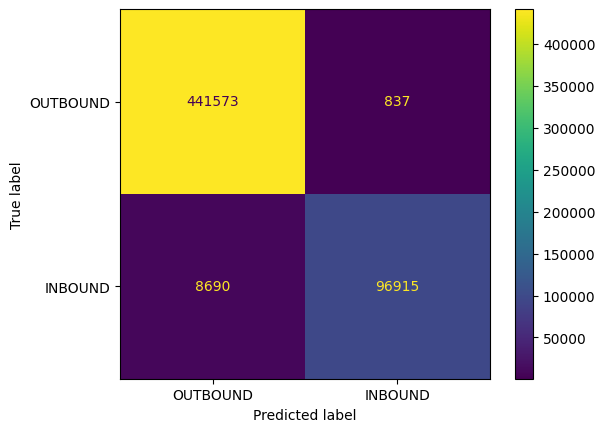

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['OUTBOUND','INBOUND'])  # Specify the labels as [1, 0]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['OUTBOUND', 'INBOUND'])
disp.plot()